In [1]:
!pip install roboflow
!pip install ultralytics


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="############", model_format='yolov8')
project = rf.workspace("yolo-vuyol").project("yolo_object_detection-lqpgs")
dataset = project.version(1).download(location='/content/my-datasets')

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/my-datasets in yolov8:: 100%|██████████| 454/454 [00:00<00:00, 832.24it/s]


In [3]:
import cv2

from google.colab.patches import cv2_imshow

In [4]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

train_results = model.train(data='/content/my-datasets/data.yaml', epochs=100)

Ultralytics YOLOv8.0.159 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/my-datasets/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=

In [5]:
val_results = model.val()

Ultralytics YOLOv8.0.159 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients
val: Scanning /content/my-datasets/valid/labels.cache... 44 images, 1 backgrounds, 0 corrupt: 100%|██████████| 44/44 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]
                   all         44         52      0.791      0.327      0.444       0.19
               buffalo         44          4          1          0          0          0
                   cow         44         16      0.551      0.188      0.383      0.184
                  goat         44         15      0.637      0.533      0.597      0.233
                  lion         44         17      0.977      0.588      0.794      0.342
Speed: 1.8ms preprocess, 30.6ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/val6


In [6]:
val_results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bb4f8094d90>
fitness: 0.21535827548284467
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([          0,     0.18426,     0.23346,     0.34224])
names: {0: 'buffalo', 1: 'cow', 2: 'goat', 3: 'lion'}
plot: True
results_dict: {'metrics/precision(B)': 0.7913631483564083, 'metrics/recall(B)': 0.3272671568627451, 'metrics/mAP50(B)': 0.44367730023580465, 'metrics/mAP50-95(B)': 0.189989494954738, 'fitness': 0.21535827548284467}
save_dir: PosixPath('runs/detect/val6')
speed: {'preprocess': 1.8201470375061035, 'inference': 30.617459253831345, 'loss': 0.0015009533275257459, 'postprocess': 4.642735828052868}

In [13]:
confusion_matrix = cv2.imread('/content/runs/detect/train3/confusion_matrix.png')

cv2_imshow(confusion_matrix)


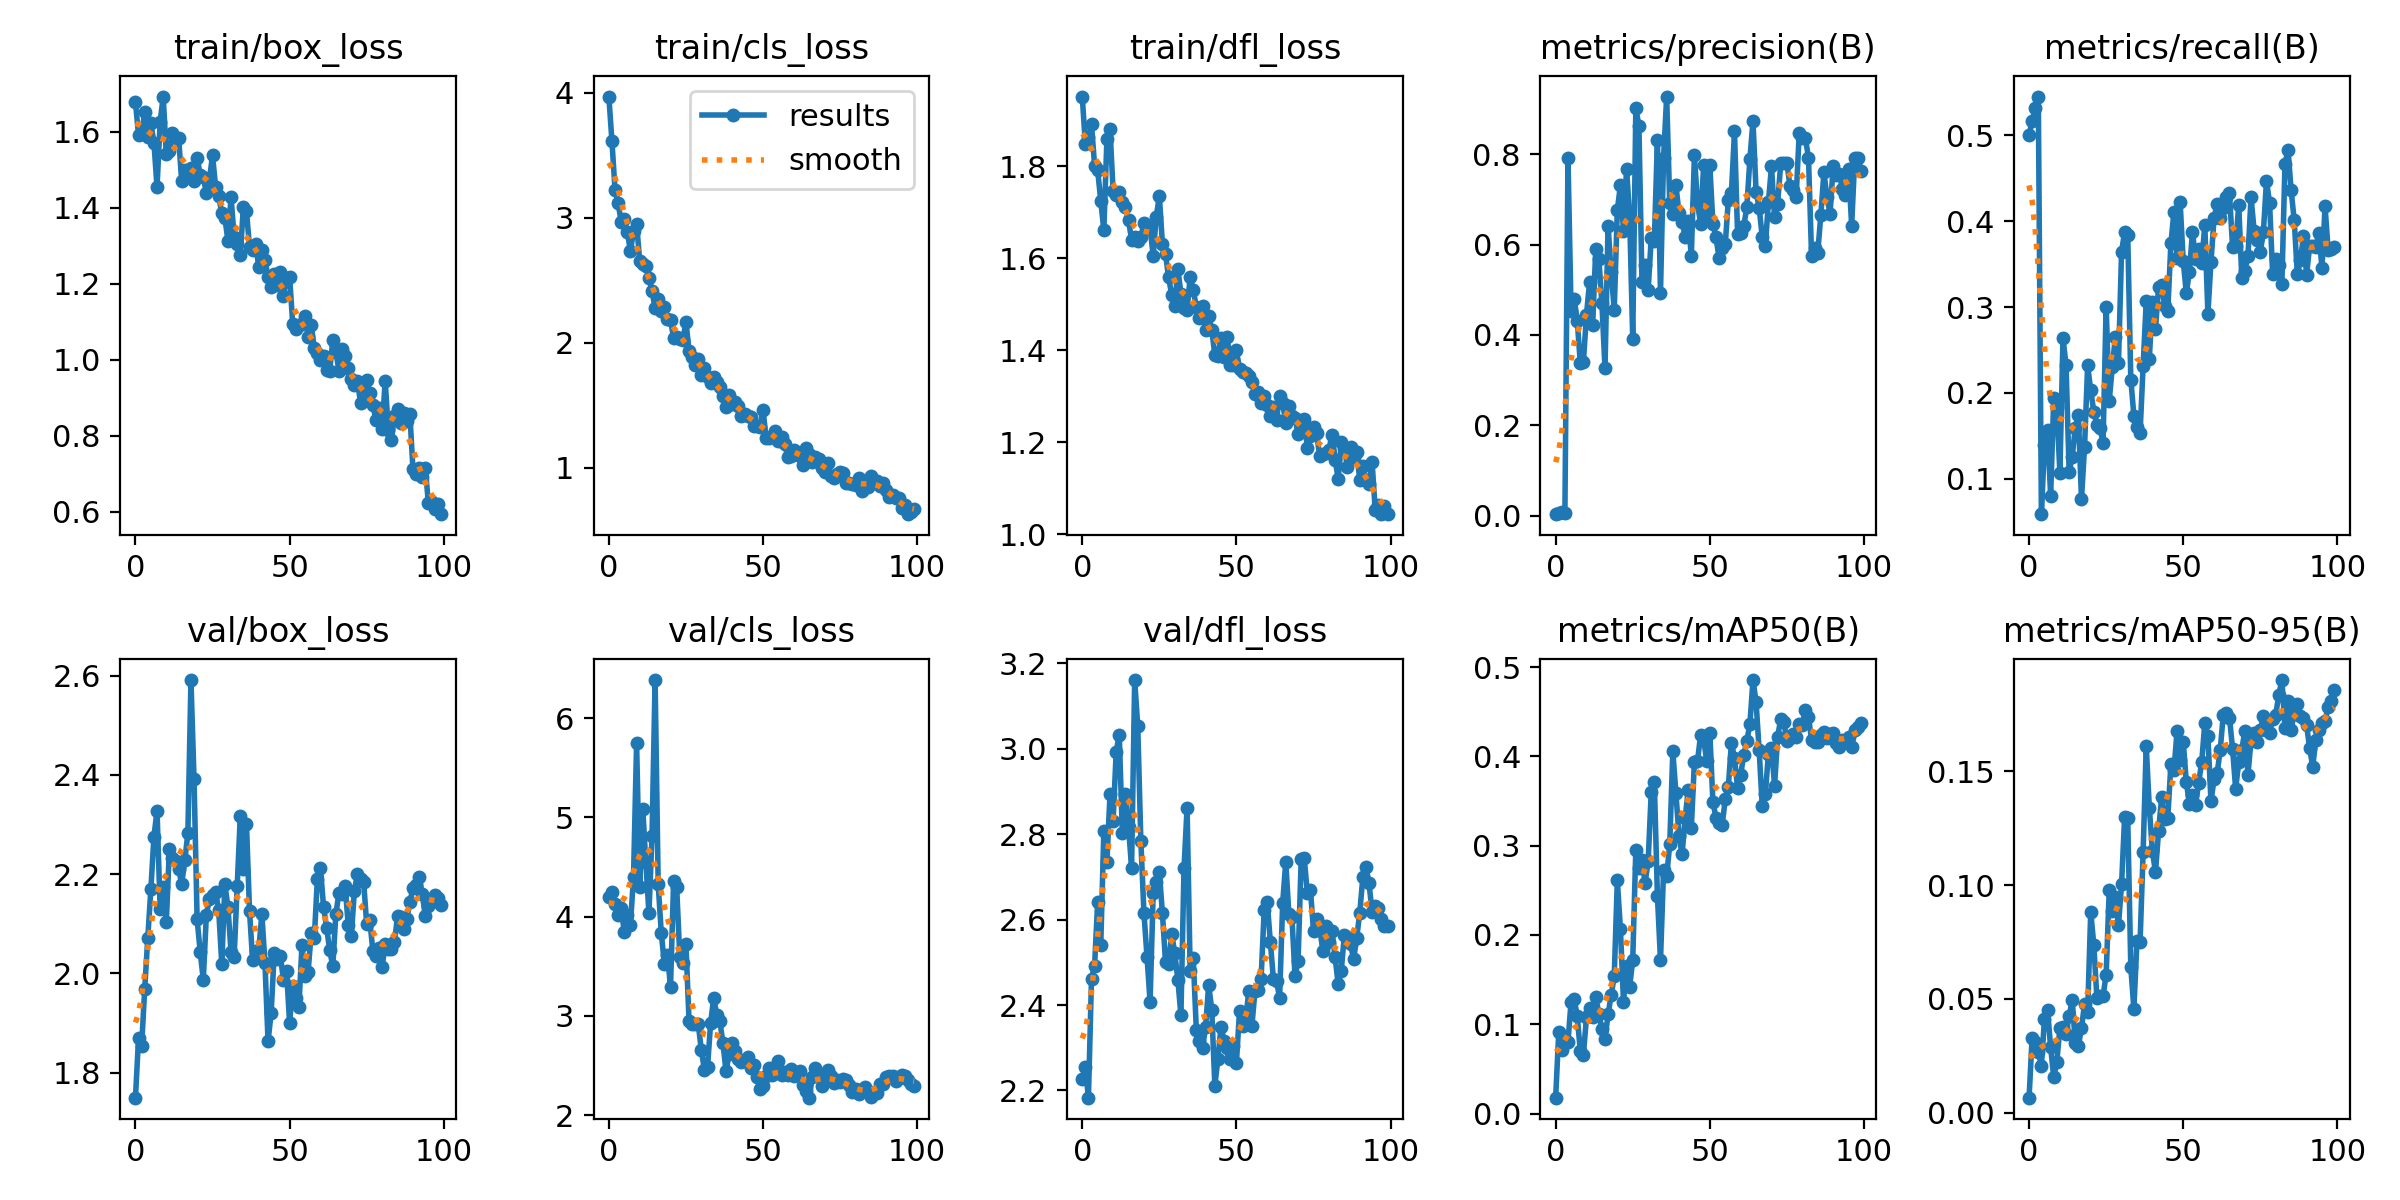

In [14]:
result_graph = cv2.imread('/content/runs/detect/train3/results.png')

cv2_imshow(result_graph)

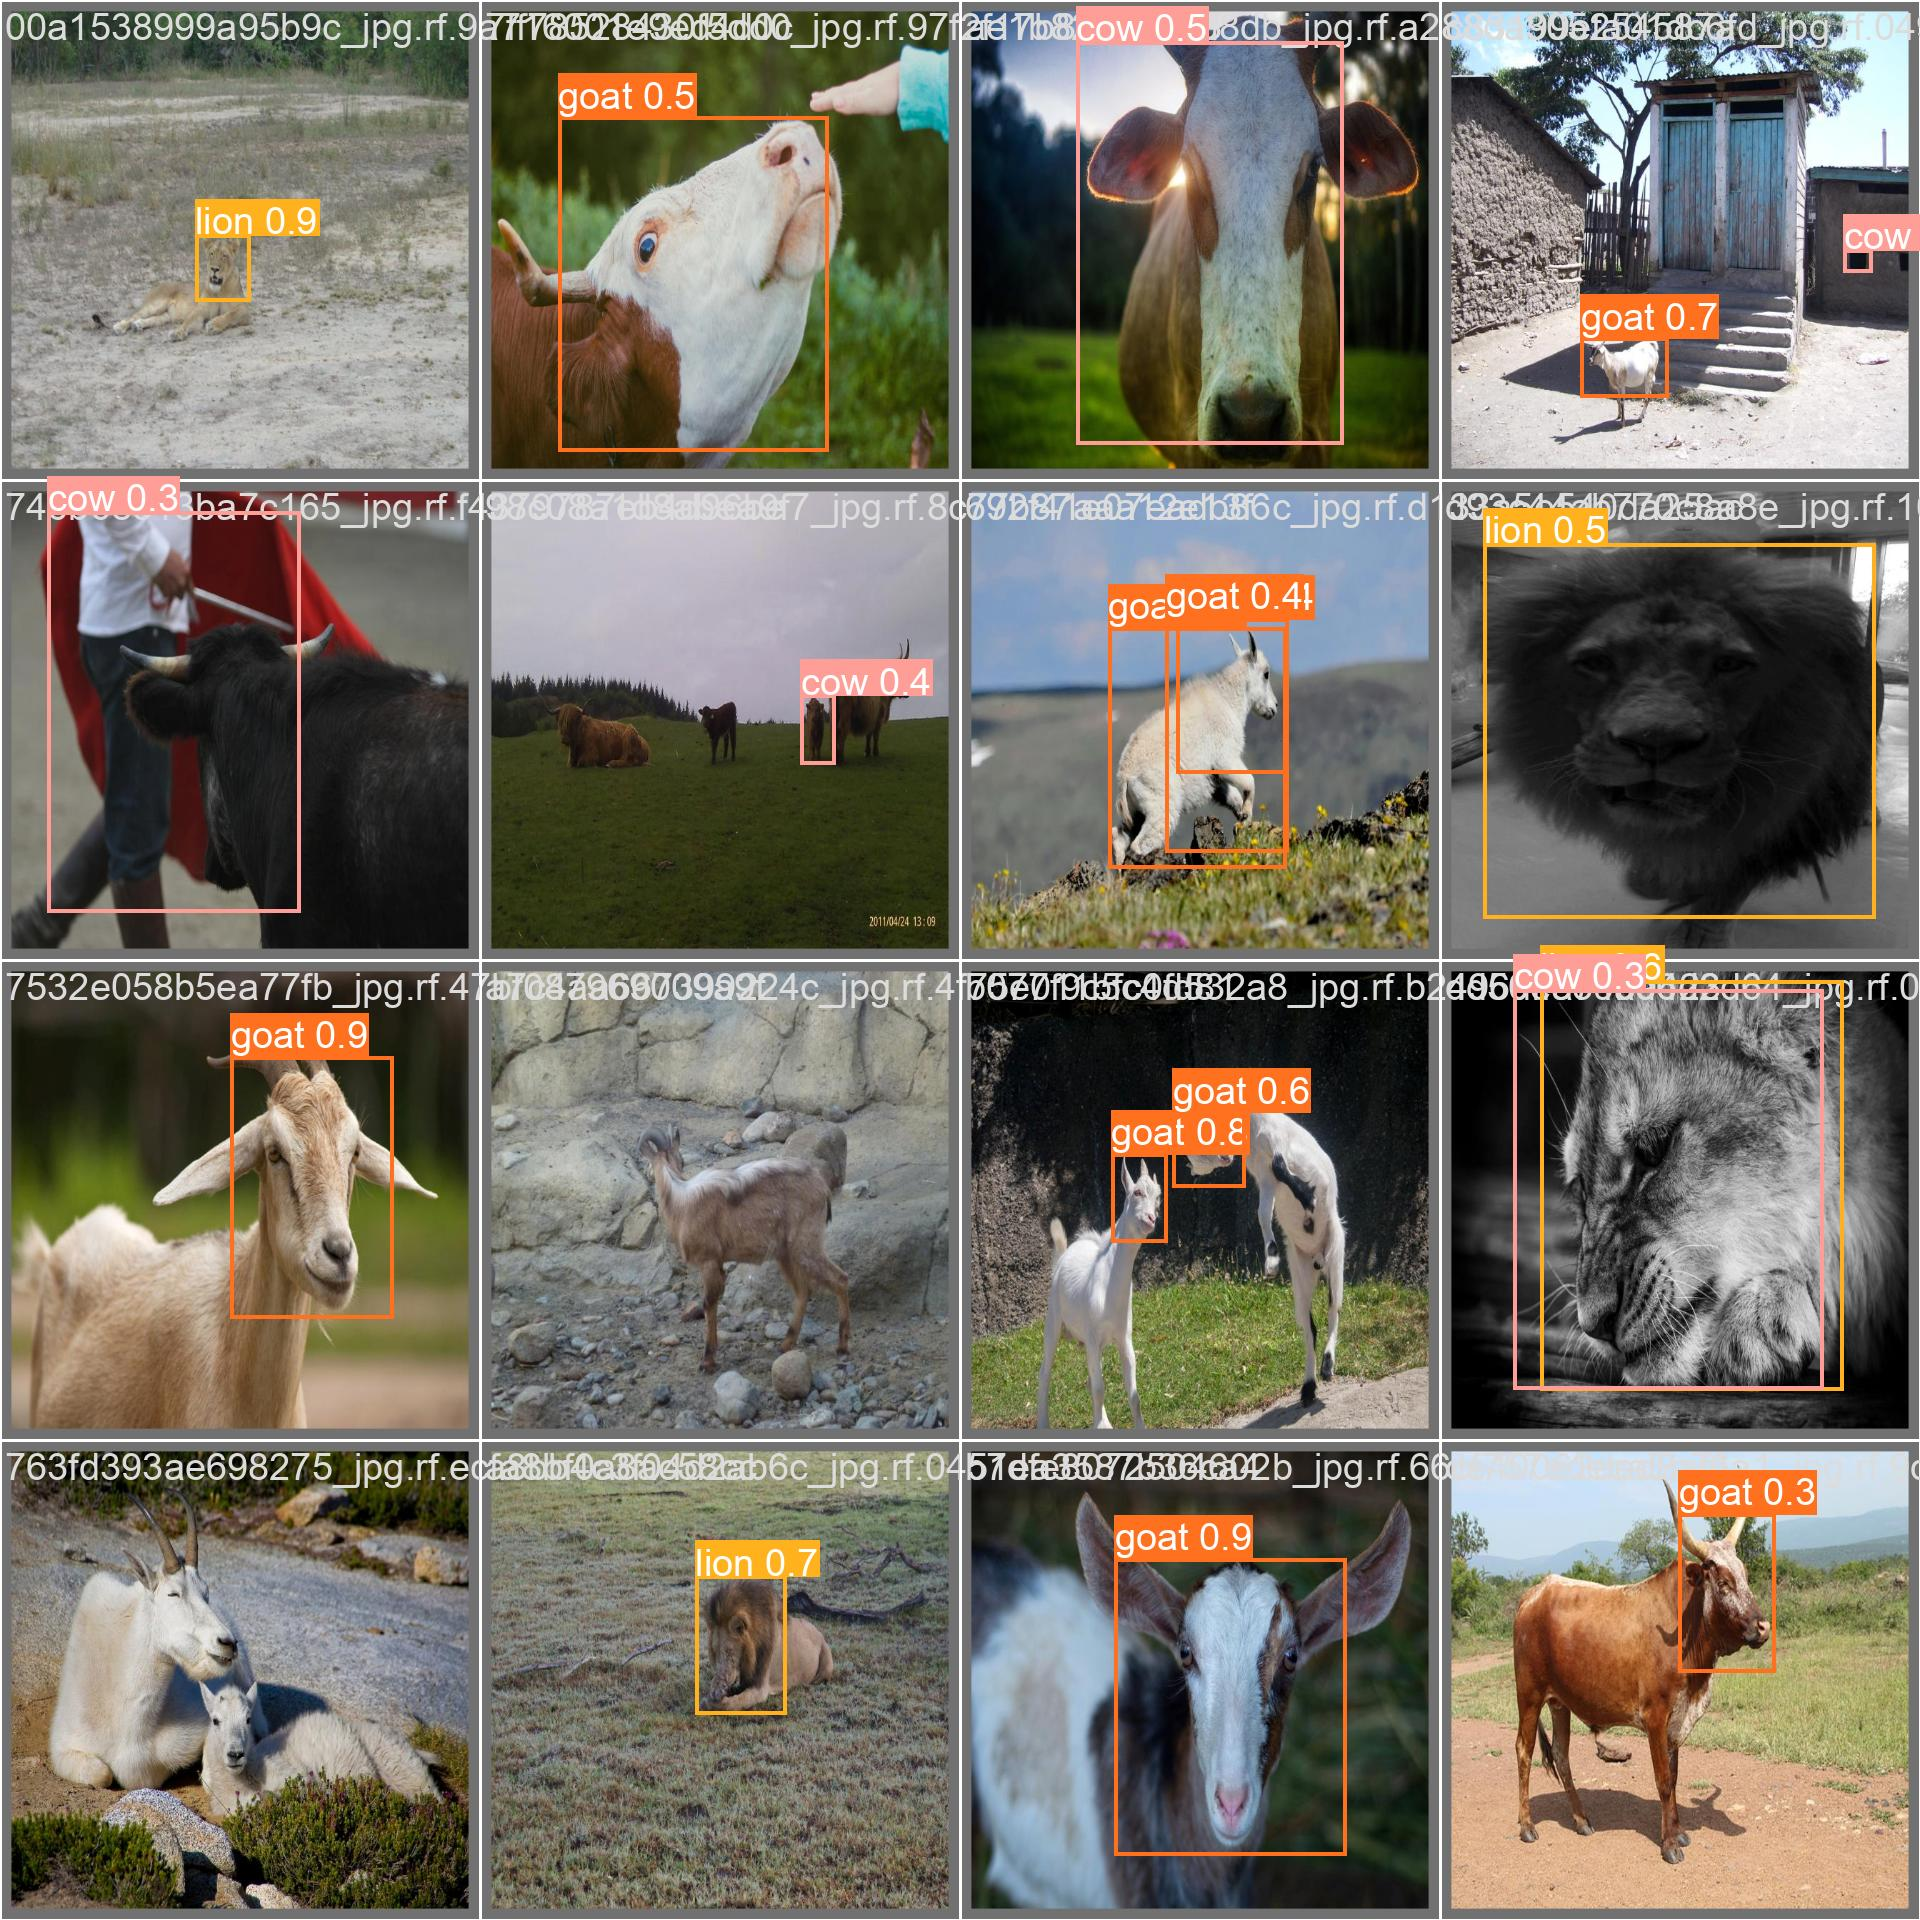

In [15]:
val_batch = cv2.imread('/content/runs/detect/train3/val_batch0_pred.jpg')

cv2_imshow(val_batch)

In [16]:
results = model.predict(source='/content/my-datasets/test/images')


image 1/22 /content/my-datasets/test/images/0418adfd3302ea9b_jpg.rf.c40c7ccedff14864f9dc14fd1db5f2ee.jpg: 640x640 1 lion, 32.5ms
image 2/22 /content/my-datasets/test/images/05fbb3844318e477_jpg.rf.a350cf35dbc8b880f524d30e132aaf32.jpg: 640x640 1 cow, 1 goat, 19.1ms
image 3/22 /content/my-datasets/test/images/07c8fb7eaa941e5e_jpg.rf.3a064830f0cb2587b5512a9c88b062dd.jpg: 640x640 1 lion, 18.4ms
image 4/22 /content/my-datasets/test/images/09234765a02cf4c4_jpg.rf.8c4398c86d483261324377ca87414eff.jpg: 640x640 1 goat, 30.2ms
image 5/22 /content/my-datasets/test/images/1be4a5ec407fc045_jpg.rf.2274fb6d5ceaca4b3c5f73e014cad498.jpg: 640x640 1 lion, 25.7ms
image 6/22 /content/my-datasets/test/images/23df699d9baad305_jpg.rf.c039c8c646d695d925ce373b430d56a3.jpg: 640x640 1 goat, 30.7ms
image 7/22 /content/my-datasets/test/images/26d8d961177e64e3_jpg.rf.b5cffef48347f5d7207bd822544f087f.jpg: 640x640 2 lions, 12.2ms
image 8/22 /content/my-datasets/test/images/2766c231ef864dfd_jpg.rf.b01b1895e476015b48cc

In [17]:
for i in range(len(results)):
  result = results[i]

  for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")



Object type: lion
Coordinates: [302, 222, 395, 376]
Probability: 0.74
---
Object type: goat
Coordinates: [16, 3, 484, 640]
Probability: 0.37
---
Object type: cow
Coordinates: [5, 0, 579, 640]
Probability: 0.31
---
Object type: lion
Coordinates: [225, 65, 600, 549]
Probability: 0.82
---
Object type: goat
Coordinates: [137, 245, 311, 543]
Probability: 0.44
---
Object type: lion
Coordinates: [136, 94, 462, 623]
Probability: 0.84
---
Object type: goat
Coordinates: [82, 88, 454, 585]
Probability: 0.9
---
Object type: lion
Coordinates: [144, 58, 567, 634]
Probability: 0.55
---
Object type: lion
Coordinates: [197, 169, 574, 633]
Probability: 0.48
---
Object type: lion
Coordinates: [174, 165, 294, 360]
Probability: 0.87
---
Object type: cow
Coordinates: [179, 33, 623, 488]
Probability: 0.55
---
Object type: cow
Coordinates: [98, 33, 548, 502]
Probability: 0.3
---
Object type: goat
Coordinates: [391, 149, 495, 254]
Probability: 0.75
---
Object type: lion
Coordinates: [392, 148, 497, 257]
Probab